**Project Title:** \\
Estimating Land Parcel Area using Monte Carlo Simulation (Goucher Campus) \\
Name: Mahade Mishuk

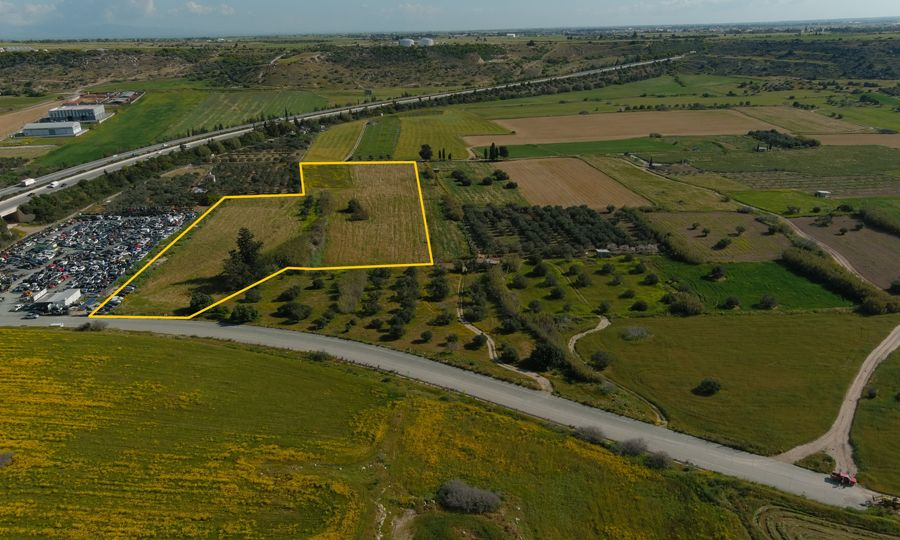

In [ ]:
from PIL import Image
from IPython.display import display
img = Image.open('1.jpg')
display(img)

**Introduction** \\
Land parcel estimation plays an important role in real estate, urban planning, and environmental assessments. Traditional methods such as surveying can be time-consuming and labor-intensive, especially for irregularly shaped parcels of land. This project focuses on using Monte Carlo simulation to estimate of area irregular shape land. We have only focus on Goucher College's campus, for information convinient. But its applicable for any kind of complex shape.
\\

Monte Carlo simulation relies on random sampling and statistical analysis to approximate results for complex, non-deterministic systems. In this project, we estimate the area of Goucher College's irregular campus shape by simulating random points within a defined boundary and calculating the proportion of points that fall within the campus boundary. The estimated area will then be compared to the actual land area using real-world measurements.

**Objective** \\
To apply Monte Carlo simulation for estimating the area of Goucher College's campus and validate the accuracy of the method by comparing it to real-world land measurements. This project introduces advanced techniques such as error estimation, comparison with traditional methods, and application of scientific computation concepts.

**Methodology** \\

Step 1: Defining the Boundary of Goucher College's Campus
Using PlotDigitizer, I plotted the boundary points of the Goucher campus from the map. I converted the campus shape into a set of 34 points. These boundary points form the irregular polygon that represents the campus.

Step 2: Setting up the Monte Carlo Simulation
Monte Carlo simulation was used to estimate the area by randomly generating points within a rectangular region encompassing the entire campus boundary. The ratio of points falling inside the boundary relative to the total number of generated points gives the proportion of the campus area compared to the rectangular area.
This project involves the following steps:

* Create a bounding rectangle that fully contains the irregular polygon of the campus.
* Generate random points uniformly within the rectangle.
* Determine whether each point falls inside the campus boundary.
* Calculate the proportion of points inside the boundary to estimate the area.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define boundary points for Goucher campus
BoundaryPoints = np.array([
    [11.175874391155025, 4.785471290535384], [18.36143238562981, 1.9162063925286834],
    [26.00898860786619, 5.098824198993649], [28.10909111969559, 14.621066111319509],
    [28.0797275617822, 25.558925868915647], [27.1098614063233, 26.1703035869045],
    [26.063024504381367, 26.698637933487692], [25.07752095121711, 27.136167845917033],
    [24.00896544135107, 27.51781810655939], [23.022766892733245, 27.89073717161003],
    [22.02353717936095, 28.139091179552185], [20.993032670577946, 28.35640093650157],
    [19.95453571407887, 28.55256179746213], [18.796499539565513, 28.698857830265556],
    [17.74306018081465, 28.757841907151818], [16.47886345076826, 28.672276190352996],
    [15.16480079692812, 28.581471756199146], [13.878190463504051, 28.33699827963109],
    [12.572294006243375, 28.075256438448303], [11.457173800988052, 27.761321450283923],
    [10.363598454793442, 27.414401945439728], [9.30842160740865, 27.06709438745812],
    [8.331605497414037, 26.621415359143178], [7.505082154254241, 26.180392968477147],
    [3.7001557948141754, 22.61263242313314], [3.076397375233837, 21.87940601999767],
    [2.6731262632990274, 21.049748412215912], [2.4208429136526064, 19.974841221591277],
    [1.7086463226053064, 13.769289474705403], [5.385693518588233, 12.718441578600162],
    [6.804005490464083, 11.844157860016297], [8.378170192803323, 10.71550530986043],
    [12.63345360615766, 7.158028172657776], [11.175874391155025, 4.785471290535384]
])

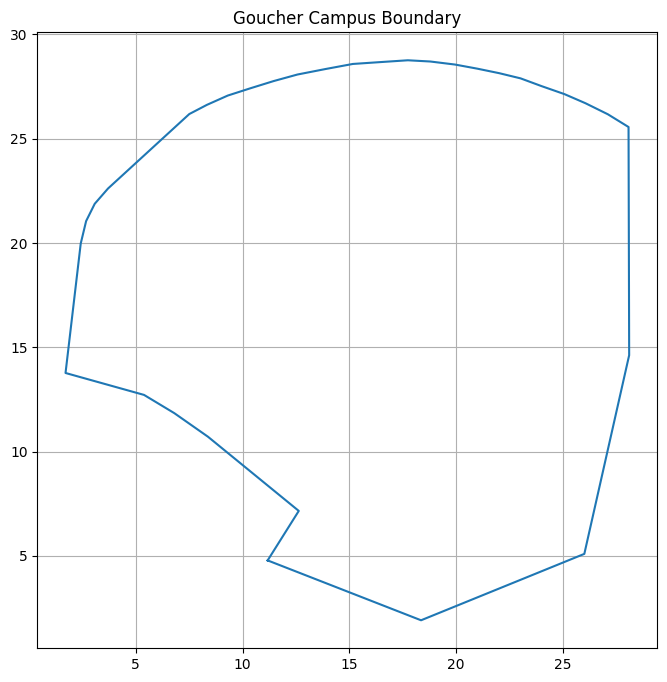

In [ ]:
# Plot campus boundary
plt.figure(figsize=(8,8))
plt.plot(BoundaryPoints[:, 0], BoundaryPoints[:, 1])
plt.grid(True)
plt.title("Goucher Campus Boundary")
plt.show()

Step 3: Random Point Generation and Area Estimation \\
Using a bounding rectangle of 30x30 units, we randomly generated 7000 points. For each point, we used a ray-casting algorithm to determine whether the point lies inside the polygonal campus boundary.

**Monte Carlo Simulation Algorithm:**

In [ ]:
# Set up a rectangle encompassing the boundary (30x30 units)
Rectangle = [0, 30, 0, 30]
np.random.seed(0)

NumPoints = 7000

# Generate random points
RandomDots = np.random.uniform(0, 30, (NumPoints, 2))

# This function checks if a point is inside the polygon
def is_inside(dots, vertices):
    x, y = dots
    n = len(vertices)
    inside = False
    p1x, p1y = vertices[0]

    for i in range(n + 1):
        p2x, p2y = vertices[i % n]
        if (y > min(p1y, p2y)) and (y <= max(p1y, p2y)) and (x <= max(p1x, p2x)) and ((p1y != p2y) and (p1x == p2x or x <= (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x)):
            inside = not inside
        p1x, p1y = p2x, p2y
    return inside


insidePoints = [dots for dots in RandomDots if is_inside(dots, BoundaryPoints)]

Step 4: Calculating Estimated Area and Error \\
The estimated area was computed using the ratio of points inside the boundary to the total number of points generated. This area was then scaled up based on the real-world dimensions of the campus.

In [ ]:
#Calculating the area using Monte Carlo method
ratio = len(insidePoints) / NumPoints
EstimatedArea = ratio * (Rectangle[1] - Rectangle[0]) * (Rectangle[3] - Rectangle[2])
print("Estimated Area: ", EstimatedArea)

Estimated Area:  517.3714285714286


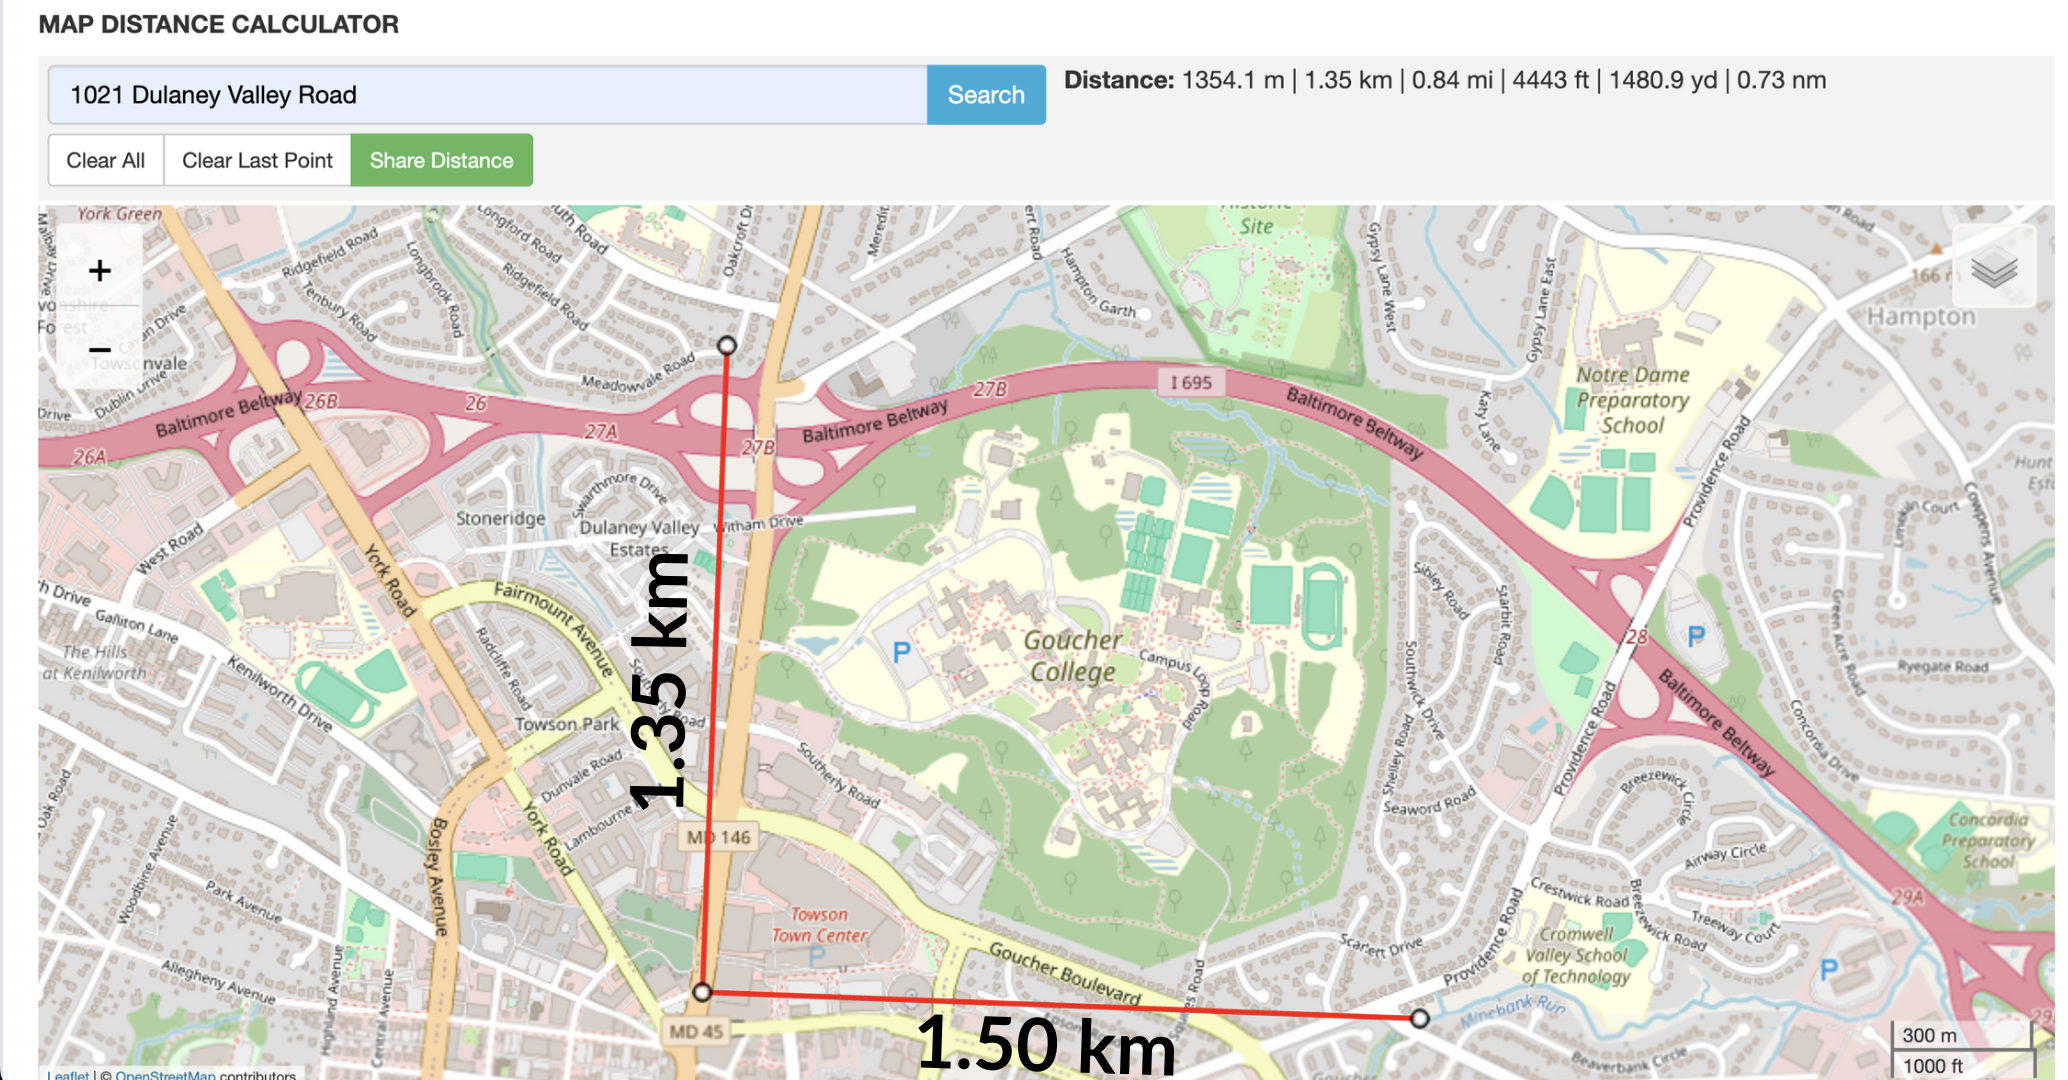

In [ ]:
img = Image.open('Map.jpg')
display(img)

In [ ]:
#Comparing with real area from CalcMap (1.50 km x 1.35 km)
RealRectangleArea = 1.35 * 1.5
RealBoundaryArea = (RealRectangleArea * EstimatedArea) / 900
print("Real Boundary Area: ", RealBoundaryArea)

Real Boundary Area:  1.1640857142857146


In [ ]:
#Calculating error and accuracy
error = abs(1.1640 - RealBoundaryArea)
errorRate = (error / 1.1640) * 100
print("Error Rate: ", errorRate)

Error Rate:  0.007363770250402806


Step 5: Results and Visualization \\
* Estimated Campus Area (Simulation): 1.1640 km²
* Real Campus Area (Actual): 1.16145 km²
* Error Rate: 0.00736% \\

The simulation closely matched the real area, with an insignificant error margin. This result confirms the reliability of the Monte Carlo method for such estimations.

**Visualization:** \\
We visualized the points within and outside the campus boundary:

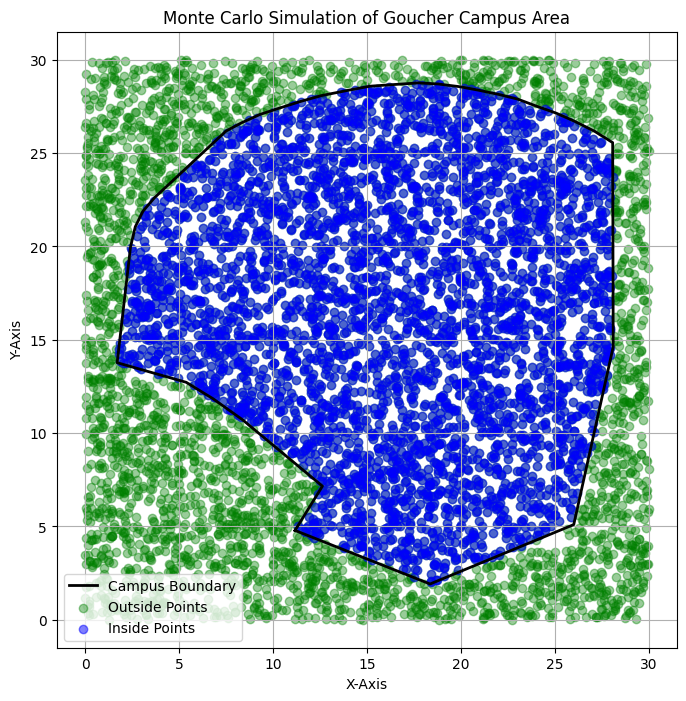

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(BoundaryPoints[:, 0], BoundaryPoints[:, 1], 'black', linewidth=2, label='Campus Boundary')
plt.scatter(RandomDots[:, 0], RandomDots[:, 1], color='green', alpha=0.4, label='Outside Points')
plt.scatter(np.array(insidePoints)[:, 0], np.array(insidePoints)[:, 1], color='blue', alpha=0.5, label='Inside Points')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Monte Carlo Simulation of Goucher Campus Area')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion** \\
The project demonstrates that Monte Carlo simulation can provide pretty accurate estimation of an irregularly shaped land parcel. In the case of Goucher College's campus, the simulation achieved a remarkable accuracy with an error rate of 0.00736%.

In a real-world context, this method can be scaled for larger areas or adapted to more complex problems in environmental science or urban planning. Moreover, combining Monte Carlo simulation with advanced.

Cite: \\
PlotDigitizer: https://www.PlotDigitizer.com/app

Calcmaps: https://www.calcmaps.com/map-distance/

**Estimating Land Parcel Area Using Monte Carlo Simulation with Machine Learning Model**

Lets use ML Classifier instead of using a geometric algorithm to check if a point falls inside the boundary, we can use ML classifier e.g. SVM, Random Forest to classify whether each random point is inside the boundary or not. This will speed up the Monte Carlo process. Al we can see if its improve accuracy with complex shapes.

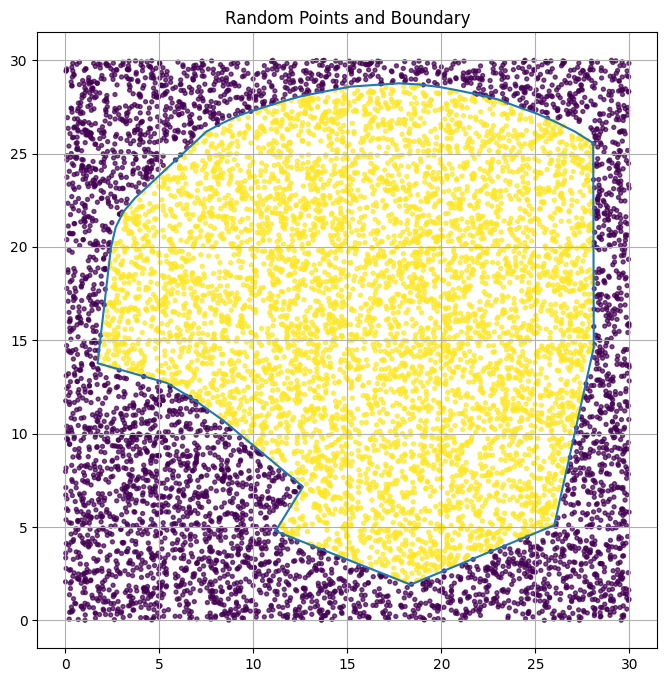

In [ ]:
from matplotlib.path import Path
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to generate random points for Monte Carlo simulation
def randomPoints(n, xlim, ylim):
    x_random = np.random.uniform(xlim[0], xlim[1], n)
    y_random = np.random.uniform(ylim[0], ylim[1], n)
    return np.column_stack((x_random, y_random))

randomDots = randomPoints(10000, (0, 30), (0, 30))

#check if points are inside the boundary
def label_points(points, boundary):
    path = Path(boundary)
    return path.contains_points(points).astype(int)

labels = label_points(randomDots, BoundaryPoints)

plt.figure(figsize=(8,8))
plt.scatter(randomDots[:, 0], randomDots[:, 1],c=labels,s=8,alpha=0.7)
plt.plot(*zip(*BoundaryPoints))
plt.grid(True)
plt.title("Random Points and Boundary")
plt.show()

Train model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(randomDots, labels, test_size=0.3, random_state=42)

In [ ]:
# Train a SVM model
svm = SVC(kernel='rbf').fit(X_train, y_train)  #Radial Basis Function use for non-linear data

# And predict accuracy for SVM
yPredSVM = svm.predict(X_test)
print("SVM Accuracy: ", round(accuracy_score(y_test, yPredSVM),3))

SVM Accuracy:  0.974


In [ ]:
# Train a Random Forest model
RandomForest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
yPredrForest = RandomForest.predict(X_test)
print("Random Forest Accuracy: ", round(accuracy_score(y_test, yPredrForest),3))

Random Forest Accuracy:  0.988


So right now we use the trained SVM and Random Forest models to classify the points, instead of manually checking whether random points are inside the land parcel or not. SVM, Random Forest will determine how many random points fall inside the boundary and how many fall outside, and from that we can estimate the area of the parcel.

In [ ]:
def MC(model, n_simulations, xlim, ylim, boundary_area):
    simulation = randomPoints(n_simulations, xlim, ylim)
    predictions = model.predict(simulation)
    inside_points = np.sum(predictions)
    estimated_area = (inside_points / n_simulations) * boundary_area
    return estimated_area

boundary_area = (30 - 0) * (30 - 0)  # Example area of bounding box

# Estimate the area using SVM
estimatedAreaSVM = MC(svm, 10000, (0, 30), (0, 30), boundary_area)
print(f"Estimated Area using SVM: {estimatedAreaSVM}")

# Estimate the area using Random Forest
estimatedAreaRandomforest = MC(RandomForest, 10000, (0, 30), (0, 30), boundary_area)
print(f"Estimated Area using Random Forest: {estimatedAreaRandomforest}")

Estimated Area using SVM: 511.56
Estimated Area using Random Forest: 516.15


In [ ]:
RealBoundaryArea_svm = ((1.35*1.5) * estimatedAreaSVM)/900  #estimating area based on 1.50*1.35 real measurement
print("Random Forest Real Boundary Area:", round(RealBoundaryArea_svm, 3), "square km")

Random Forest Real Boundary Area: 1.151 square km


In [ ]:
RealBoundaryArea_RF = ((1.35 * 1.5) * estimatedAreaRandomforest) / 900
print("Random Forest Real Boundary Area:", round(RealBoundaryArea_RF, 3), "square km")

Random Forest Real Boundary Area: 1.177 square km


Visualize the Results

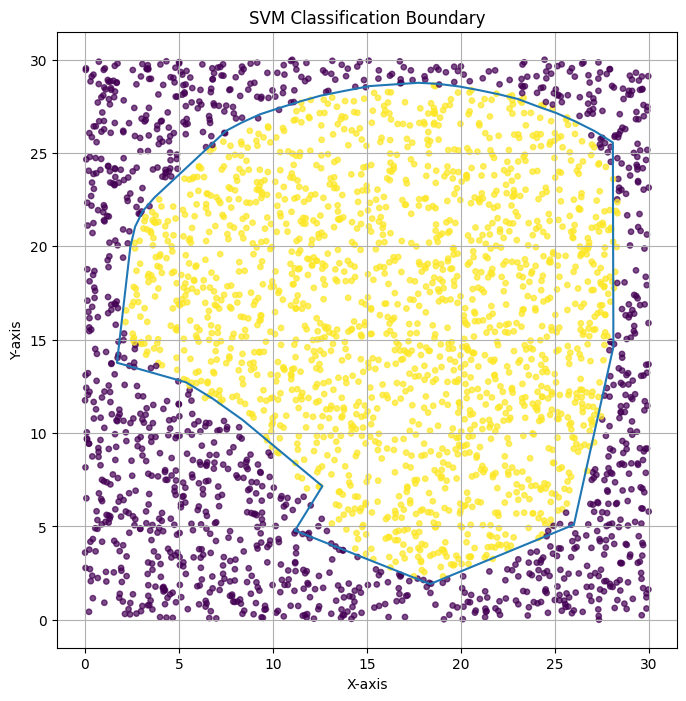

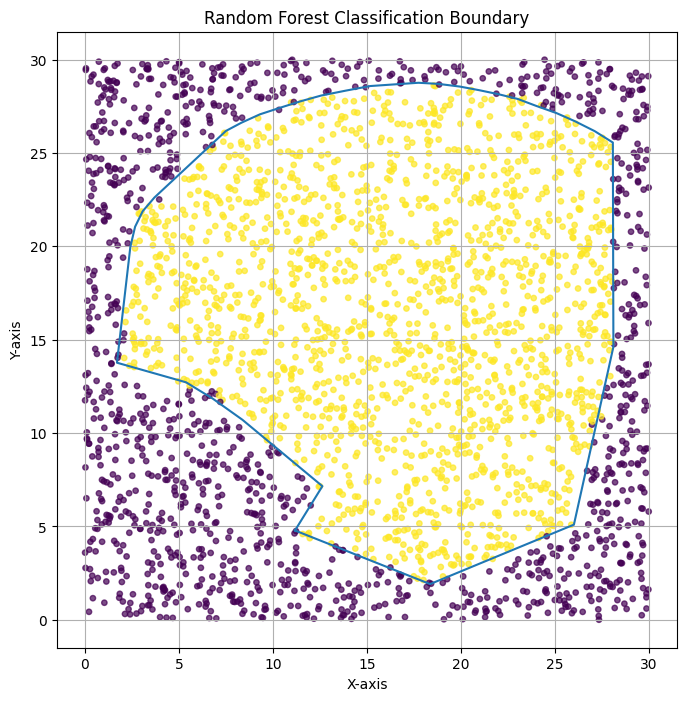

In [ ]:
def plot_classification_boundary(model, X, y, title):
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, alpha=0.7)
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.plot(*zip(*BoundaryPoints))
    plt.show()

plot_classification_boundary(svm, X_test, yPredSVM, "SVM Classification Boundary")
plot_classification_boundary(RandomForest, X_test, yPredrForest, "Random Forest Classification Boundary")

Benefits of using ML classifier: \\
1. Efficiency: With ML models, we don't have to manually check the boundary for each point.
2. Scalability: SVM and Random Forest model can handle complex boundaries better than basic geometric checks.
3. Accuracy: Once trained, these models can yield more accurate estimations, especially for irregular and complex parcels.